In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC #specify in the report the classifier use from scikit learn, for all 3 projects
from sklearn.datasets import load_wine

dataset = load_wine() #load the wine dataset
X = dataset["data"] #assign features to X matrix
y = dataset["target"] # assign labels to Y vector
feature_names = dataset["feature_names"]

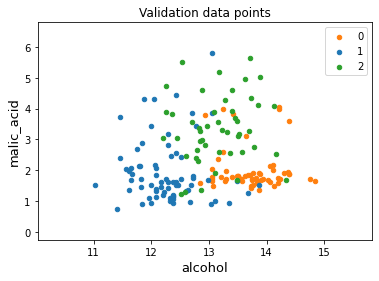

In [3]:
# Calculate min, max and limits on validation set
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot validation set data with respective labels
plt.figure()

color = ['tab:orange', 'tab:blue', 'tab:green']
for i in [0, 1, 2]:
    mask = y==i
    plt.scatter(X[mask, 0], X[mask, 1], c=color[i], s = 20, label = i)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Validation data points")
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.legend()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

#shuffle = default True, since y array is ordered by category

X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size = 0.3, shuffle = True, 
                                                    random_state = 1000, stratify = y) #test size = 30% of the total

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.285, shuffle = True,
                                                 random_state = 300, stratify = y_train) #0.285*0.7 = 0.2 = validation set size

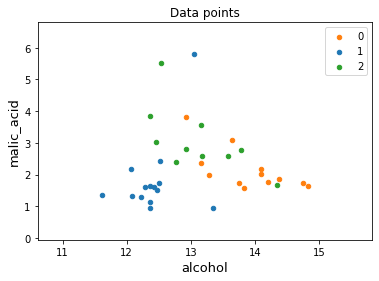

In [5]:
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#24BCD2'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

# Calculate min, max and limits on validation set
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1

# Plot validation set data with respective labels
plt.figure()

color = ['tab:orange', 'tab:blue', 'tab:green']
for i in [0, 1, 2]:
    mask = y_val==i
    plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], s = 20, label = i)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Data points")
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.legend()
plt.show()

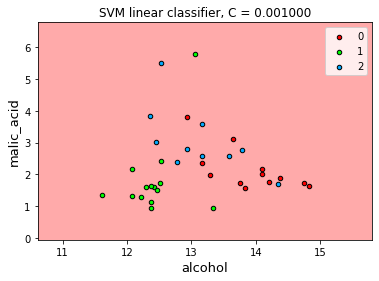

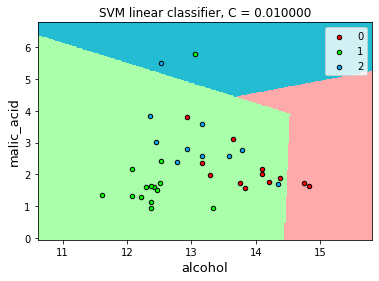

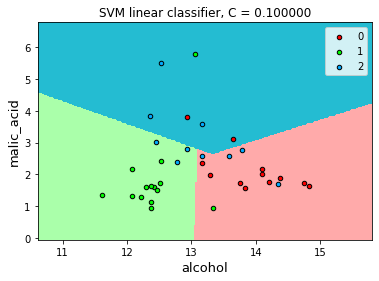

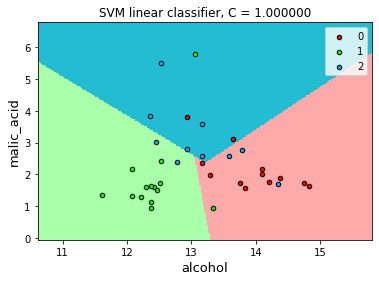

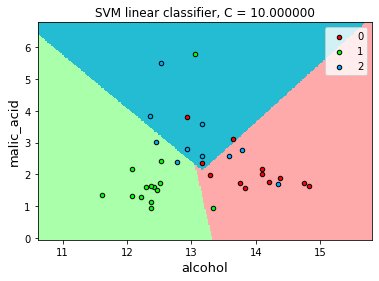

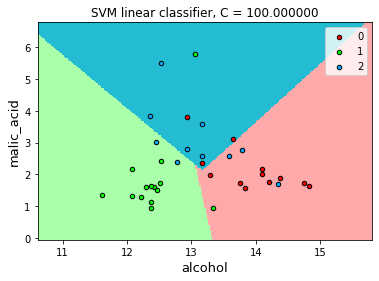

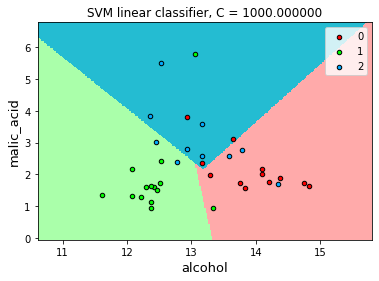

In [19]:
from sklearn.metrics import accuracy_score

h = .02  # step size in the mesh
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy = np.zeros(len(C), dtype = float)
y_val_pred = np.zeros((len(C), y_val.shape[0]))
index = 0

for c in C:
    clf = SVC(C = c, kernel = 'linear')
    clf.fit(X_train, y_train)
    y_val_pred[index] = clf.predict(X_val)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
    y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1

    #define meshgrid to represent boundaries on the plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #make predictions over all points in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z.shape = xx.shape[0]*xx.shape[1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the validation points, with ground truth label y_val
    color = ['#FF0000', '#00FF00', '#00AAFF']
    for i in [0, 1, 2]:
        mask = y_val == i
        plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], cmap=cmap_bold,
                    edgecolor='k', s=20, label = i)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(feature_names[0], fontsize = 13)
    plt.ylabel(feature_names[1], fontsize = 13)
    plt.title("SVM linear classifier, C = %f" % (c))
    plt.legend()

    plt.show()

    
        
    accuracy[index] = accuracy_score(y_val, y_val_pred[index])
    index+=1

In [20]:
accuracy

array([0.38888889, 0.44444444, 0.69444444, 0.75      , 0.72222222,
       0.72222222, 0.72222222])

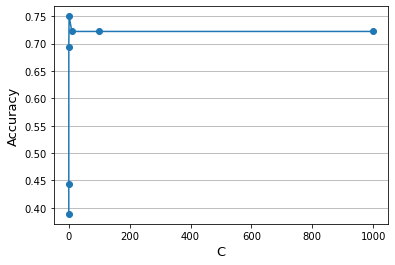

In [10]:
plt.figure()
plt.xlabel('C', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
plt.grid(True, axis = 'y')
plt.plot(C, accuracy, linestyle='-', marker='o')

The Latter graph is characterized by hard readability. Since accuracy for C = [1, 10, 100, 1000] has same value, my decision is to keep 
C lowest as possible, since that from 1 on, admitting more error in the classification does not increase performance.
Given this consideration, th eplot remains significant for C varying from 0.001 to 1, and gains in significance 
being more readable

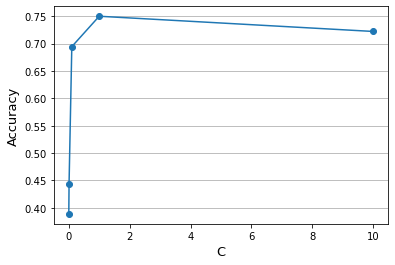

In [12]:
plt.figure()
plt.xlabel('C', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
plt.grid(True, axis = 'y')
plt.plot(C[0:5], accuracy[0:5], linestyle='-', marker='o')

Being the hyperparameter tuning step concluded, the model can now perform on the test set.
Exploiting the previous graph the chosen value of C is __C = 1__

In [13]:
clf = SVC(C = 1)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred).round(decimals = 2)

test_accuracy

0.74

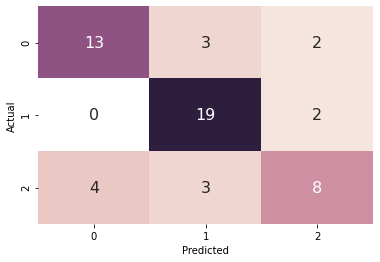

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cmap = sns.cubehelix_palette(light=1, as_cmap=True)

conf_mat = confusion_matrix(y_test, y_test_pred)

# Plot the result
label_names = ['0', '1', '2']
conf_mat_df = pd.DataFrame(conf_mat, index = label_names, columns = label_names)
conf_mat_df.index.name = 'Actual'
conf_mat_df.columns.name = 'Predicted'
sns.heatmap(conf_mat_df, annot=True, cmap= cmap, 
            annot_kws={"size": 16}, cbar=False)
plt.show()